## Linear Regression Analysis

#### *The problem*
*An ecommerce company provided us with a dataset of ecommerce related attributes. We need to find relationships and decide what contributes more to the company's profits, the App or the Website.*
*The Company sells clothing online but they also have an in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.*

#### *The Dataset consists of the following variables:*
* *Email: Email of customer*
* *Address: Address of customer*
* *Avatar: The Avatar of the customer when he uses the App or the Website.*
* *Avg. Session Length: Average session of in-store style advice sessions.*
* *Time on App: Average time spent on App in minutes.*
* *Time on Website: Average time spent on Website in minutes.*
* *Length of Membership: How many years the customer has been a member.*

*Let's import some libraries*


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

*Let's read the dataset as a DataFrame and inspect the Head*

In [4]:
ecom = pd.read_csv('Ecommerce Customers.csv')

In [5]:
ecom.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


*We can observe that we have 4 independent numeric Variables 'Avg. Session Length', 'Time on App', 'Time on Website' and 'Length of Membership'. We have 3 independent categorical variables 'Email', 'Address' and 'Avatar'. 'Yearly Amount Spent' is are dependent Target Variable.*

*The 'Email', 'Address' and 'Avatar' columns are unrelated with the essence of our problem, since they dont seem like they are going to contribute something useful. We will drop them from the dataset*

In [7]:
ecom.drop(['Email', 'Address', 'Avatar'], axis = 1, inplace=True)

*Now let's inspect again the head of our dataframe*

In [8]:
ecom.head()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,34.497268,12.655651,39.577668,4.082621,587.951054
1,31.926272,11.109461,37.268959,2.664034,392.204933
2,33.000915,11.330278,37.110597,4.104543,487.547505
3,34.305557,13.717514,36.721283,3.120179,581.852344
4,33.330673,12.795189,37.536653,4.446308,599.406092


*Ok, much cleaner now*

*Let's check some basic things on our dataframe and see if we can find any outliers or missing values. If we find any, we have to deal with them accordingly*

In [9]:
ecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 5 columns):
Avg. Session Length     500 non-null float64
Time on App             500 non-null float64
Time on Website         500 non-null float64
Length of Membership    500 non-null float64
Yearly Amount Spent     500 non-null float64
dtypes: float64(5)
memory usage: 19.7 KB


*Ok the Dataframe has 5 columns with 500 entries each, so no missing values*

In [10]:
ecom.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


*By observing the mean, min and max for each attribute, we can conclude that there seem to be no outliers*

*Ok, now back to the problem. It seems to be a Linear Regression task where after we build our model and validate it we will try to explain the regression coefficients and based on that find out what contributes more to the companys profits*

*But before we do that, we have to explore the relationships with our variables 1st and inspect clearly whether the independent variables have linear relationships with the Target variable and whether thay are correlated or not. An issue that we want to be aware is that we want the independent variables to be correlated with our Target but not with each other*

*Let's start with a pairplot, that plots pairwise relationships for the entire dataset*

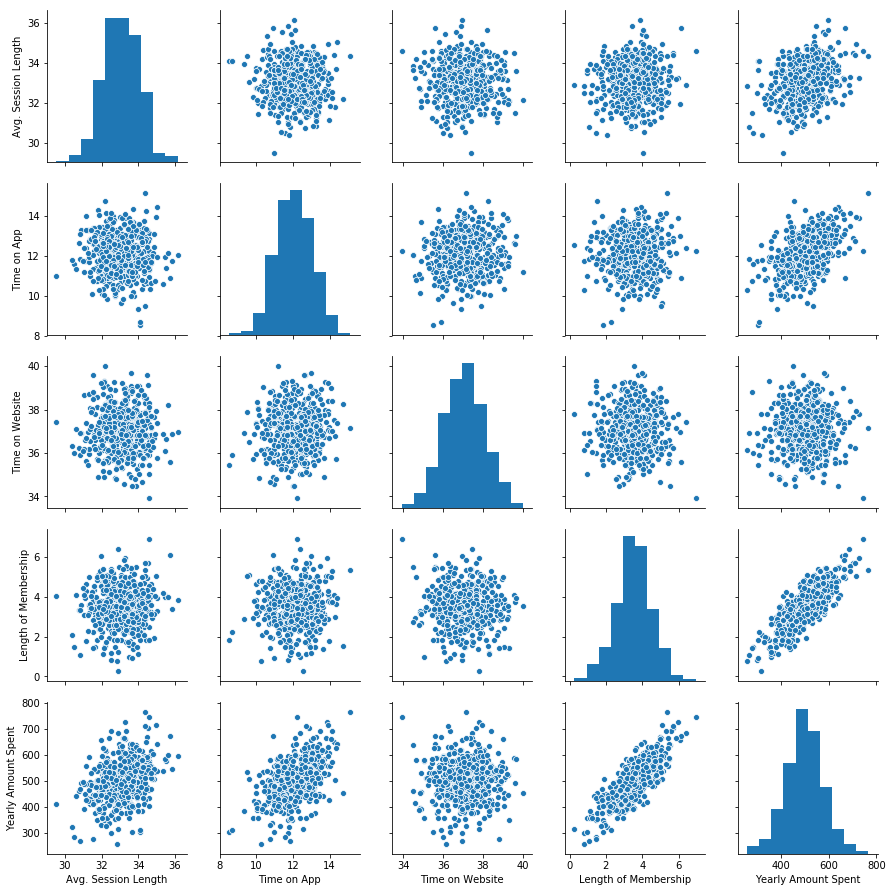

In [11]:
sns.pairplot(ecom)

*From here we can observe that all the variables are almost normally distributed (a desirable thing in linear regression) and there seems to be some correlation and linear relationship between 'Time on App' and our Target and a clear correlation and linearity between 'Length of Membership' and Target.*

*We will Zoom in to are data, to observe these relationships better and for these reason we will plot seaborn's jointplots  that match up 2 distribution plots for bivariate data, for every pair of independent / dependent attributes*

In [12]:
ecom.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

C:\Users\mixal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


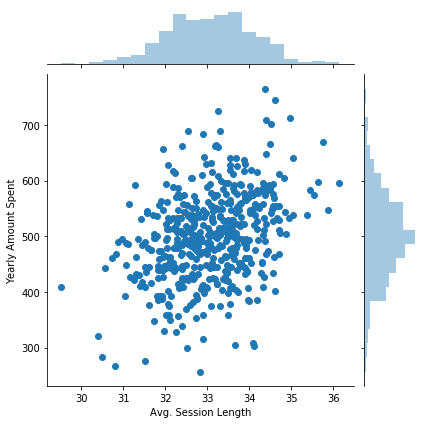

In [13]:
sns.jointplot(x = 'Avg. Session Length', y ='Yearly Amount Spent', data = ecom )

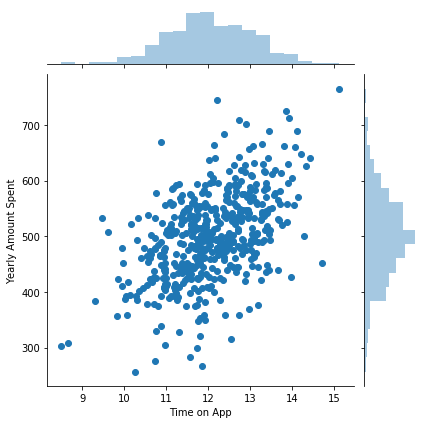

In [14]:
sns.jointplot(x = 'Time on App', y ='Yearly Amount Spent', data = ecom )

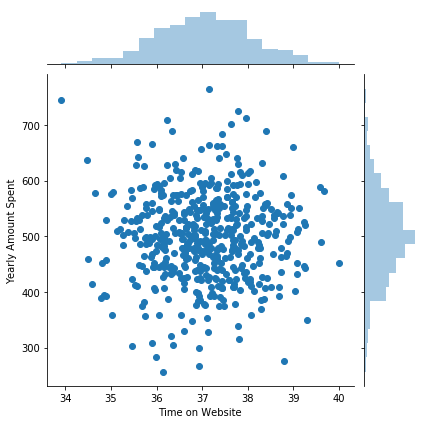

In [15]:
sns.jointplot(x = 'Time on Website', y ='Yearly Amount Spent', data = ecom )

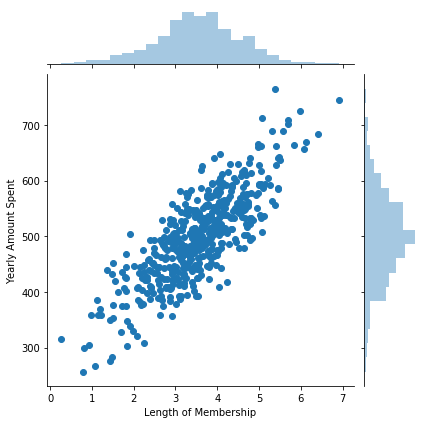

In [16]:
sns.jointplot(x = 'Length of Membership', y ='Yearly Amount Spent', data = ecom )

*From here we can conclude that:*
* *'Avg. Session Length' is slightly correlated with the target and exhibits some linearity.*
* *'Time on App' is correlated with the target and exhibits some linearity.*
* *'Time on Website' seems to be uncorrelated.*
* *'Length of Membership' seems to be very correlated with a strong linear relationship.*

*Now we will create a correlation matrix, to see the correlations better and observe whether or not the is any multicollinearity present. Remember, as we discussed before, it is important that are independent variables are not highly correlated with each other.*

*The correlation coefficient is a measure of linear correlation between two sets of data. It is the ratio between the covariance of two variables and the product of their standard deviations, thus it is essentially a normalised measurement of the covariance, such that the result always has a value between −1 and 1. A value of -1 means perfect negative correlation. A value of 1 means perfect positive correlation. While a value of 0 means no correlation at all.*

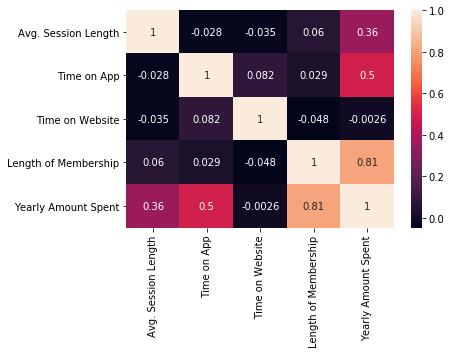

In [17]:
sns.heatmap(ecom.corr(), annot=True)

*Nice, from here we can observe that all the dependent variables are not correlated with each other. While the Target variable has some correlation except with the 'Time on Website' column. Biggest correlation seem to be with 'Length of Membership' with the significant 0.81.*

*One last thing before we proceed to modelling is to check and verify that our Target variable follows a normal distribution*

C:\Users\mixal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


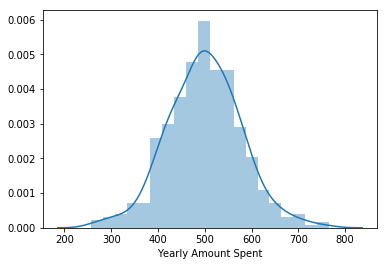

In [19]:
sns.distplot(ecom['Yearly Amount Spent'])

*Ok, it seems that our target variabe follows a real world normal distribution, so we are good to go*

#### Create our Features

In [20]:
ecom.columns

Index(['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership', 'Yearly Amount Spent'],
      dtype='object')

In [21]:
X = ecom[['Avg. Session Length', 'Time on App', 'Time on Website',
       'Length of Membership']]
y = ecom['Yearly Amount Spent']

#### Create the Training and Testing Datasets

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [25]:
X_train.shape

(335, 4)


In [27]:
y_train.shape

(335,)

In [28]:
X_test.shape

(165, 4)

In [29]:
y_test.shape

(165,)

#### Instantiate the model, train it and get predictions

In [30]:
from sklearn.linear_model import LinearRegression

In [32]:
lm = LinearRegression()
lm.fit(X_train, y_train)
predictions = lm.predict(X_test)

#### Validation
* *First things first in order to validate our model and check if it was the correct fit we have to observe the Residuals and verify that they follow a normal distribution with a mean of 0.*
* *Second, we have to check for homoscedasticity, which is a key assumption for Linear Regression. Linear Regression assumes that the variance of the Residuals is the same regardless of the value of the Target or Predictor variables. If the variance of the residuals varies, they are said to be heteroscedastic and the assumption of Linear Regression falls.*
* *When we check the above and are sure, we can continue by printing out the regular Linear Regression validation metrics such as the Mean absolute and Mean Squared errors.*

#### Check for normality of Residuals

C:\Users\mixal\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


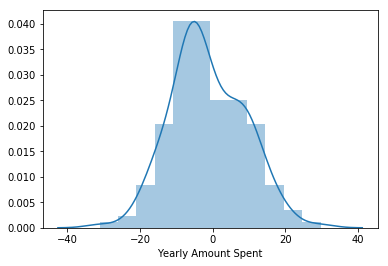

In [34]:
sns.distplot((y_test - predictions))

*Nice, from the above histogram we can clearly see that the Residuals follow a normal distribution with a mean of 0. This is important to have because one of the big problems with non-normality in the residuals is that the amount of error in our model is not consistent across the full range of our observed data. This basically means that the amount of predictive ability that the independent variables (predictors) have is not the same across the full range of the dependent variable (target). Thus, our predictors can mean different things at different levels of the target variable, leading to significant model interpretation inaccuracies.*

#### Check for Homoscedasticity of the Residuals

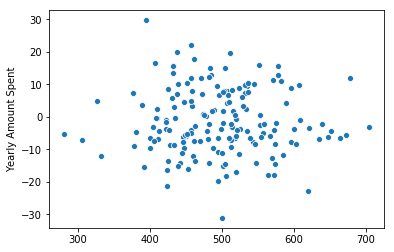

In [35]:
residuals = y_test - predictions
sns.scatterplot(predictions, residuals)

*By plotting the error terms with the predicted values we can check that there should not be a clear pattern on the data points. If there is a definite pattern obtained from the scatterplot, then heteroscedasticity is present and the Linear Assumption is broken. If the points are randomly dispersed around the horizontal axis, then a linear regression model was appropriate for our data. Otherwise, if they exhibit any patterns such as U-shapes a different model is appropriate.*

*From the above scatterplot we can inspect that the data points are randomly dispersed around the 0 horizontal axis, not forming any patterns so the Linear Assumption was correct.*

*One last step before we calculate our validation metrics is to plot the observed values Vs the predicted ones, just to get a quick grasp at how well our model performed*

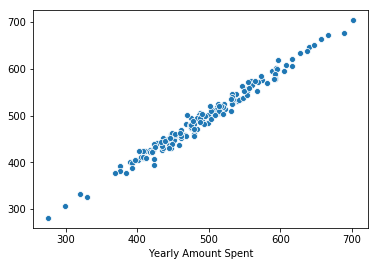

In [38]:
sns.scatterplot(y_test, predictions)

*Again, it seems that our model is a good fit*

#### Validation metrics

In [40]:
from sklearn import metrics

In [41]:
print( 'Mean Absolute Eroor MAE', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squared Error MSE', metrics.mean_squared_error(y_test, predictions))
print('Root Mean Squared Error RMSE', np.sqrt(metrics.mean_squared_error(y_test, predictions)))
print('Explained Variance Score R^2', metrics.explained_variance_score(y_test,predictions))

Mean Absolute Eroor MAE 8.353573525017568
Mean Squared Error MSE 102.4042865993193
Root Mean Squared Error RMSE 10.119500313717042
Explained Variance Score R^2 0.9814710935431786


*Seems that our results are good, especially the explained variance score R^2 which is a 0.98 meaning that our model can interpret 98% of the variance, nice.*

*Now that we finshed building our model and validated it, it's time to return to the problem at hand. Meaning which contributes more to the profits of the company, the App or the Website*

*In order to check for these relationships, now that we know that are model is fairly accurate and the assumptions of the Linear Regression stand true, meaning it will be correctly interpretable, we are going to print the coefficients of each independent variable and interpret them.*

*A regression coefficient tells us whether there is positive or negative correlation between each independent variable and the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.*

*The coefficient value, on the other hand, signifies how much the mean of the dependent variable changes, given a one-unit shift in the independent variable while holding other variables in the model constant.*

In [44]:
coefficients = pd.DataFrame(lm.coef_, X.columns, columns= ['Coefficient'])

In [45]:
coefficients

,Coefficient
Avg. Session Length,25.706762
Time on App,38.572608
Time on Website,0.625201
Length of Membership,61.717676


*From the above table we can see that:*
* *A one-unit increase of 'Avg. Session Length' is assosiated with an increase of ~25 dollars spent per year*
* *A one-unit increase of 'Time on App' is assosiated with an increase of ~39 dollars spent per year*
* *A one-unit increase of 'Time on Website' is assosiated with an increase of ~1 dollars spent per year*
* *A one-unit increase of 'Length of Membership	' is assosiated with an increase of ~62 dollars spent per year*

*By interpreting the coefficients we can clearly see that the App contributes waaaay more to the companys profits. So now it's in the hands of the company to decide whether to focus more on building an even better App, or focus to the problematic area by building and operating a better website. One thing is for certain though, the company has to majorly invest on having Happy, Lengthy Memberships.*
